Program 6 : Develop a program for stock market prediction using LSTM

[*********************100%%**********************]  1 of 1 completed


Epoch 1/25
62/62 [==============================] - 16s 10ms/step - loss: 6666.6392
Epoch 2/25
62/62 [==============================] - 0s 8ms/step - loss: 3708.6484
Epoch 3/25
62/62 [==============================] - 0s 8ms/step - loss: 2490.6892
Epoch 4/25
62/62 [==============================] - 1s 8ms/step - loss: 1872.3284
Epoch 5/25
62/62 [==============================] - 0s 8ms/step - loss: 592.1061
Epoch 6/25
62/62 [==============================] - 0s 8ms/step - loss: 152.5973
Epoch 7/25
62/62 [==============================] - 0s 8ms/step - loss: 69.4425
Epoch 8/25
62/62 [==============================] - 0s 8ms/step - loss: 42.2392
Epoch 9/25
62/62 [==============================] - 1s 8ms/step - loss: 26.7096
Epoch 10/25
62/62 [==============================] - 0s 8ms/step - loss: 17.9122
Epoch 11/25
62/62 [==============================] - 0s 8ms/step - loss: 14.3425
Epoch 12/25
62/62 [==============================] - 1s 8ms/step - loss: 13.0577
Epoch 13/25
62/62 [======

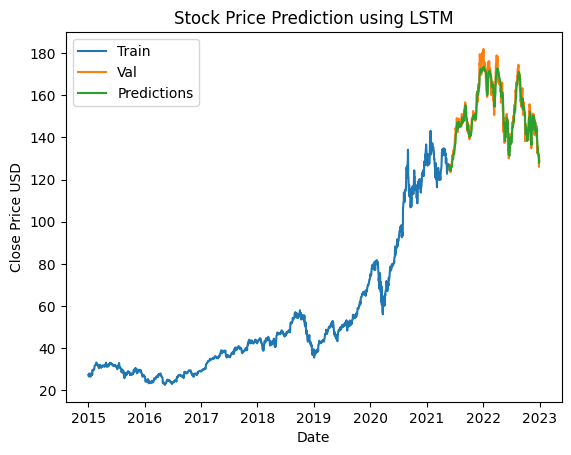

In [ ]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df = yf.download('AAPL', start='2015-01-01', end='2023-01-01')[['Close']]

scaled_data = df.values

x_train, y_train = [], []
for i in range(60, len(scaled_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential([
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(64, activation = 'relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25)

train_size = int(len(df) * 0.8)
test_data = df[train_size-60:].values

x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)

train = df[:train_size]
valid = df[train_size:].copy()
valid['predicitons'] = predictions
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predicitons']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()